# Section 1. Introduction to the problem/task and dataset
The dataset contains house prices for King County which is located in the US State of Washington. It includes homes sold between May 2014 and May 2015. It is an IBM dataset that focused on predicting the prices of houses in the USA through analysis.

In the realm of real estate and housing, the condition of a property plays a pivotal role in its market value. Understanding and accurately assessing the condition of houses is essential for buyers, sellers, and real estate professionals alike.

To address this need, we embark on a project aimed at classifying houses based on their condition. The condition of a house, graded on a scale of 1 to 5, serves as our target variable. This classification task will empower us to predict and differentiate houses based on their state of repair and maintenance.

# Section 2. Description of the dataset


<!-- https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html -->
<!-- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction -->

The dataset of this project encompasses a comprehensive collection of housing records, each providing insights into the conditions and attributes of residential properties. It serves as the foundation for our task of classifying houses based on their condition. This dataset has been meticulously assembled from multiple sales transactions, capturing houses that have changed ownership over time.

The data for these sales comes from the official public records of home sales in the King County area, Washington State. The data sets contains 21613 rows. Each represents a home sold from May 2014 through May 2015.

## Structure

The dataset is structured as a single file in the widely-used CSV (Comma-Separated Values) format. Each row in the dataset represents a distinct house sale event, while each column corresponds to an attribute or feature of the property.

In total, the dataset comprises:
- `21613` instances; and
- `21` features.

## Features

### Brief Description of Features

Our dataset encompasses a rich array of features, both numerical and categorical, each contributing to our understanding of the condition and characteristics of houses. Below is a list of the features included in the dataset, grouped by relevance.

**Location**
- `lat` and `long` represent the latitude and longitude of the house's location.

**Size:**
- `sqft_living` is the square footage of the interior living space.
- `sqft_lot` is the square footage of the land.
- `sqft_living15` is the square footage of interior living space for the nearest 15 neighbors.
- `sqft_lot15` is the square footage of the land lots of the nearest 15 neighbors.

**Rooms:**
- `bedrooms` counts the number of bedrooms in the house.
- `bathrooms` counts the number of bathrooms. A value of .5 indicates a room with a toilet but no shower.

**Floors:**
- `floors` is the number of floors in the house.

**Waterfront and View:**
- `waterfront` is a binary variable, indicating whether the house overlooks the waterfront (1 for yes, 0 for no).
- `view` is an index from 0 to 4, rating the quality of the property's view.

**Condition and Grade:**
- `condition` is an index from 1 to 5, indicating the condition of the apartment.
- `grade` is an index from 1 to 13, where 1-3 represent lower-quality construction, 7 indicates average quality, and 11-13 signify high-quality construction and design.

**Square Footage Above and Below Ground:**
- `sqft_above` represents the square footage of the interior housing space above ground level.
- `sqft_basement` represents the square footage of the interior housing space below ground level.

**Year Information:**
- `yr_built` is the year the house was initially built.
- `yr_renovated` is the year of the last house renovation.

**Location:**
- `zipcode` indicates the zipcode area where the house is situated.

These attributes provide quantitative details about the properties. In contrast, categorical data, such as 'waterfront' and 'view,' offer qualitative information about specific aspects of the houses. It's important to clarify the significance of each feature as it guides our analysis and classification process. Even those features not directly utilized in our study may hold relevance for a comprehensive understanding of housing conditions.

### Full Feature Table

| Feature        | Description                                                                             |
|----------------|-----------------------------------------------------------------------------------------|
| id             | Unique ID for each home sold                                                            |
| date           | Date of the home sale                                                                  |
| price          | Price of each home sold                                                               |
| bedrooms       | Number of bedrooms                                                                    |
| bathrooms      | Number of bathrooms, where .5 accounts for a room with a toilet but no shower         |
| sqft_living    | Square footage of the apartment's interior living space                               |
| sqft_lot       | Square footage of the land space                                                       |
| floors         | Number of floors                                                                      |
| waterfront     | A dummy variable for whether the apartment was overlooking the waterfront or not     |
| view           | An index from 0 to 4 of how good the view of the property was                          |
| condition      | An index from 1 to 5 on the condition of the apartment                                 |
| grade          | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design |
| sqft_above     | The square footage of the interior housing space that is above ground level           |
| sqft_basement  | The square footage of the interior housing space that is below ground level           |
| yr_built       | The year the house was initially built                                                 |
| yr_renovated   | The year of the house’s last renovation                                                |
| zipcode        | What zipcode area the house is in                                                     |
| lat            | Latitude                                                                              |
| long           | Longitude                                                                             |
| sqft_living15  | The square footage of interior housing living space for the nearest 15 neighbors     |
| sqft_lot15     | The square footage of the land lots of the nearest 15 neighbors                         |


# Section 3. List of Requirements

In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)
SEED = 42

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Geological Visualization
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, log_loss

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Section 4. Data Preprocessing and Cleaning

Since we intend to classify houses based on their condition, we want to remove biases that may arise from duplicate data. We will remove duplicate rows from the dataset. In this case, there are duplicate houses due to the fact that some houses were sold more than once during the period of study. We will remove the duplicates and keep the last instance of the house.

## Data Preprocessing

### Reading the Data

In [2]:
df = pd.read_csv('house_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Removing Duplicates

In [3]:
df_old_rows = len(df)

# Store rows with duplicate ids in a separate dataframe
df_duplicates = df[df.duplicated(['id'], keep=False)]

# Store rows from df_duplicates tha are not the most recent sale in a separate dataframe
df_duplicates = df_duplicates[df_duplicates.duplicated(['id'], keep='last')]

# Remove rows from df that are in df_duplicates
df = df.drop(df_duplicates.index)

# Print number old and new number of rows
print(f'Old Rows: {df_old_rows}\nNew Rows: {len(df)}\nRemoved Rows: {len(df_duplicates)}')

Old Rows: 21613
New Rows: 21436
Removed Rows: 177


In [4]:
# Confirm there are no more duplicate ids
df[df.duplicated(['id'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## Data Cleaning

We will now clean the data by checking for missing values or incorrect data types.

In [5]:
# Check for string values in the dataframe
df.select_dtypes(include=['object']).columns

Index(['date'], dtype='object')

### Missing Values

In [6]:
# Check for missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

### Negative Values

In [7]:
# Check for negative values (excluding longitude, latitude, date, and id)
excluded_cols = ['id', 'long', 'lat', 'date']
df[(df.drop(excluded_cols, axis=1) < 0).any(axis=1)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### Data Update

There is a date column. We will extract the `year`, `month`, `day`, and `day_of_week` from the date column to see if this information is useful for our classification task.

In [8]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [9]:
# Extract features from date
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df['day_sold'] = df['date'].dt.day
df['day_of_week_sold'] = df['date'].dt.dayofweek

# One-hot encode day_of_week
df = pd.get_dummies(df, columns=['day_of_week_sold'])

# Section 5. Exploratory Data Analysis

## Data Summary and Visualization

### Initial Breakdown

In [10]:
# Generate a summary of the dataset
# Remove columns with no significant data and format the output
remove_cols = ['id', 'date']
df_summary = df.drop(remove_cols, axis=1).describe().transpose()
df_summary = df_summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
df_summary = df_summary.round(2)
df_summary = df_summary.rename(columns={'mean': 'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', '25%': '25th Percentile', '50%': '50th Percentile', '75%': '75th Percentile', 'max': 'Maximum'})
df_summary

,Mean,Standard Deviation,Minimum,25th Percentile,50th Percentile,75th Percentile,Maximum
price,541649.96,367314.93,75000.00,324866.00,450000.00,645000.00,7700000.00
bedrooms,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,2082.70,919.15,290.00,1430.00,1920.00,2550.00,13540.00
sqft_lot,15135.64,41538.62,520.00,5040.00,7614.00,10696.25,1651359.00
floors,1.50,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,0.24,0.77,0.00,0.00,0.00,0.00,4.00
condition,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,7.66,1.17,1.00,7.00,7.00,8.00,13.00


### Visualizations

#### House Prices

We will now look at the numerical distribution of house prices.

In [11]:
# Print the numerical data behind `price`
df['price'].describe().apply(lambda x: format(x, 'f'))

count      21436.000000
mean      541649.962726
std       367314.929395
min        75000.000000
25%       324866.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

The average price for a house appears to be `$541,649.9627` with a standard deviation of `$367,314.9294`. The minimum price for a house is `$75,000.0000` and the maximum price for a house is `$7,700,000.0000`.

#### House Built and Renovated

We now know that most houses are in average condition. Let's see how many houses were built and renovated.

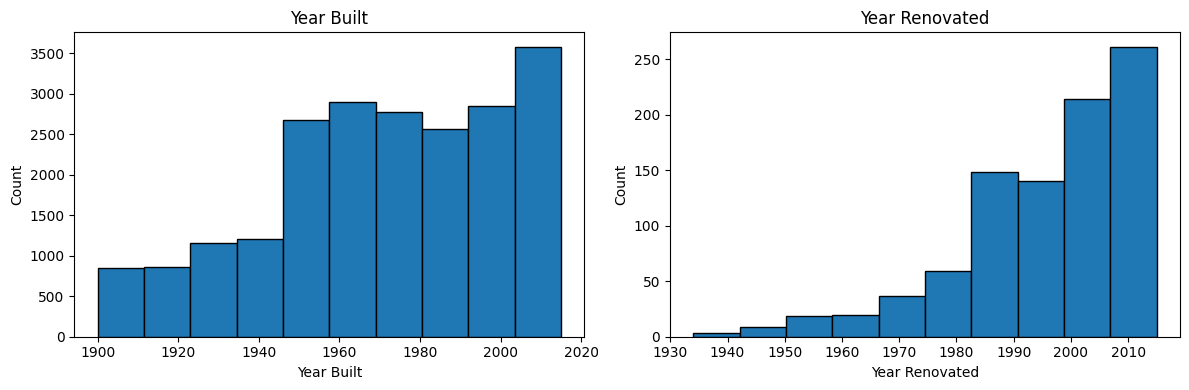

Renovated: 910
Not Renovated: 20526


Most houses were built in 2014
Number of houses built in 2014: 559
Most houses were renovated in 2014
Number of houses renovated in 2014: 91


In [12]:
# Create a new figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot the 'Year Built' histogram on the first subplot (ax1)
ax1.hist(df['yr_built'], edgecolor='k')
ax1.set_title('Year Built')
ax1.set_xlabel('Year Built')
ax1.set_ylabel('Count')

# Plot the 'Year Renovated' histogram on the second subplot (ax2)
renovated = df[df['yr_renovated'] > 0]
ax2.hist(renovated['yr_renovated'], edgecolor='k')
ax2.set_title('Year Renovated')
ax2.set_xlabel('Year Renovated')
ax2.set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

# Print how many houses have been renovated and how many have not
print(f'Renovated: {len(renovated)}\nNot Renovated: {len(df) - len(renovated)}')

print('\n')

# Print the year most houses were built and the number of houses built in that year
print(f'Most houses were built in {df["yr_built"].mode()[0]}')
print(f'Number of houses built in {df["yr_built"].mode()[0]}: {len(df[df["yr_built"] == df["yr_built"].mode()[0]])}')

# Print the year most houses were renovated and the number of houses renovated in that year (don't include houses that haven't been renovated)
print(f'Most houses were renovated in {renovated["yr_renovated"].mode()[0]}')
print(f'Number of houses renovated in {renovated["yr_renovated"].mode()[0]}: {len(renovated[renovated["yr_renovated"] == renovated["yr_renovated"].mode()[0]])}')


Given the data, it seems that the renovated houses are not that many. Meaning that most houses are in their original state. Most houses appear to be built and renovated in 2014. This means that most houses are new and have not been renovated yet. However, we must consider that the data was collected from May 2014 to May 2015. This may have underlying effects on the data due to the fact that the data was collected in a span of one year and that 2014 is the most recent year in the data.

#### House material grade

The material grade of a house is an important factor in determining the condition and price of a house. Let's see how many houses are in each material grade.

`grade` - 
*An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design*

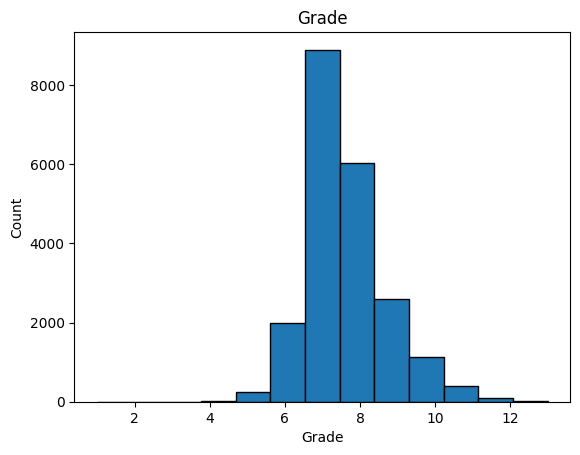

grade
7     8896
8     6044
9     2606
6     1995
10    1130
11     396
5      234
12      89
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [13]:
# Plot the grade distribution
plt.hist(df['grade'], bins=13, edgecolor='k')
plt.title('Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Print the value counts for `grade`
df['grade'].value_counts()


Most houses appear to be in grade 7. This means that most houses have an average level of construction and design. This means that most houses are not that well-built and designed. This may be a factor in determining the condition of a house.

- Only four (4) houses are in grade 1-3 meaning that only four (4) houses are poorly built and designed and in poor condition.
- `498` houses are in grade 11-13 meaning that `498` houses are well-built and designed and in good condition.
- `16,554` houses are in grade 4-10 meaning that `16,554` houses are averagely built and designed and in average condition.
  - `2047` houses are in grade 4-6 meaning that `2047` houses are below average condition.
  - `8896` houses are in grade 7 meaning that `8896` houses are average condition.
  - `6611` houses are in grade 8-10 meaning that `6611` houses are above average condition.

The construction of most houses appear to be on the higher spectrum of material grade. It is more likely that most houses are in average to above average condition.

#### Rooms

Now, let's have a quick look at the number of bedrooms and bathrooms in houses.

In [ ]:
# Plot bedrooms and bathrooms on separate plots as a histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

ax1.hist(df['bedrooms'], edgecolor='k')
ax1.set_title('Bedrooms')
ax1.set_xlabel('Bedrooms')
ax1.set_ylabel('Count')

ax2.hist(df['bathrooms'], edgecolor='k')
ax2.set_title('Bathrooms')
ax2.set_xlabel('Bathrooms')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Describe bedrooms and bathrooms
df[['bedrooms', 'bathrooms']].describe()



Upon observation, it is common for houses to have `three (3)` bedrooms and `two (2)` bathrooms. This may infer that most houses are built for families. Containing possibly at least three persons.

#### Square Feet

Lastly, let's have a look at the square feet of houses. This may help us determine the size of houses.

In [ ]:
# Plot the `sqft_lot` and `sqft_living` columns on separate plots as a histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

ax1.hist(df['sqft_lot'], edgecolor='k')
ax1.set_title('Square Feet Lot')
ax1.set_xlabel('Square Feet Lot')
ax1.set_ylabel('Count')

ax2.hist(df['sqft_living'], edgecolor='k')
ax2.set_title('Square Feet Living')
ax2.set_xlabel('Square Feet Living')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Describe `sqft_lot` and `sqft_living` and format the output. Add another column for the percentage difference between the two
sqft = df[['sqft_lot', 'sqft_living']].describe()
sqft['difference'] = sqft['sqft_lot'] - sqft['sqft_living']
sqft['difference_percentage'] = sqft['difference'] / sqft['sqft_lot']
sqft = sqft.round(2)
sqft = sqft.rename(columns={'sqft_lot': 'Square Feet Lot', 'sqft_living': 'Square Feet Living'})
sqft

On average, houses have a square feet of `2082.70` and a lot size of `15135.64`. We observe that there is about `86%` of the lot that goes unused. However, for lower lot sizes, it's around `44%`. This possibly infers that the smaller the lot size, the more likely it is that the lot is fully utilized.

### Findings

Based on the summary of the various features, we can infer the following:
- Most houses are in average condition and it is more likely that most houses are in average to above average condition.
- `22.56%` of the houses have renovated at least once. It is more likely that most houses are in their original state.
- Most houses are in grade 7 meaning that most houses have an average level of construction and design. It is also more likely for houses to have grade 7 and higher, meaning houses are in average to above average in terms of construction quality.
- Most houses have `three (3)` bedrooms and `two (2)` bathrooms. It is more likely that most houses are built for families.
- We observe that commonly, there is about `86%` of the lot that goes unused. However, for lower lot sizes, it's around `44%`. This possibly infers that the smaller the lot size, the more likely it is that the lot is fully utilized.

## Class Distribution Analysis

#### Condition of Houses

Let's start by finding out what are the number of houses in each condition.

In [ ]:
# Histogram of the `condition` column with labels
plt.hist(df['condition'], bins=5, edgecolor='k')
plt.title('Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# Also print the value counts
df['condition'].value_counts()

In [ ]:
# Get percentage of the houses based on condition
condition_percentages = df['condition'].value_counts(normalize=True)

# Format the percentages to 2 decimal places
condition_percentages.map(lambda x: '{:.2f}%'.format(x*100))


On average, most houses would fall under the 3.0 category. This means that most houses are in average condition. Meaning, out of `21436` houses, `13911` houses are in average condition. This means that `64.90%` of the houses are in average condition.

As for those with above average houses, houses under 4.0 and 5.0 are considered above average. This means that out of `21436` houses, `7332` houses are above average. This means that `34.20%` of the houses are above average.
- There are `5646` houses with a condition of four (4). They comprise `26.33%` of the houses.
- There are `1687` houses with a condition of five (5). They comprise `7.87%` of the houses.

As for those with below average houses, houses under 1.0 and 2.0 are considered below average. This means that out of `21436` houses, `193` houses are below average. This means that `0.9%` of the houses are below average.
- There are `164` houses with a condition of two (2). They comprise `0.77%` of the houses.
- There are `29` houses with a condition of one (1). They comprise `0.14%` of the houses.

## Correlation Analysis

Since we are classifying houses based on their condition, we want to know which features are correlated to the condition of a house. This will help us determine which features are important in determining the condition of a house.

### Visualizations

#### Price

Price is the most common determinant of quality in products. It is common belief in most people that the more expensive a product is, the better the quality. This may also be true for houses. Let's see if the price of a house is correlated to its condition.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Original Scatter plot
axes[0].scatter(df['condition'], df['price'])
axes[0].set_title('Condition vs Price')
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Price')

# Add a correlation line to the first scatter plot (axes[0])
correlation_line = np.polyfit(df['condition'], df['price'], 1)
axes[0].plot(df['condition'], np.polyval(correlation_line, df['condition']), color='orange', linestyle='dashed', linewidth=2)

# Get correlation coefficient for condition and price
correlation_coefficient = np.corrcoef(df['condition'], df['price'])[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

# Calculate median price for each condition
median_prices = df.groupby('condition')['price'].median().reset_index(name='median_price')

# Scatter plot with normalized median prices and a connecting line
axes[1].scatter(median_prices['condition'], median_prices['median_price'])
axes[1].plot(median_prices['condition'], median_prices['median_price'], color='red', linestyle='dashed', marker='o', markersize=8)
axes[1].set_title('Condition vs Median Price with Trend Line')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Median Price')

# Calculate mean price for each condition
mean_prices = df.groupby('condition')['price'].mean().reset_index(name='mean_price')

# Scatter plot with normalized mean prices and a connecting line
axes[2].scatter(mean_prices['condition'], mean_prices['mean_price'])
axes[2].plot(mean_prices['condition'], mean_prices['mean_price'], color='red', linestyle='dashed', marker='o', markersize=8)
axes[2].set_title('Condition vs Mean Price with Trend Line')
axes[2].set_xlabel('Condition')
axes[2].set_ylabel('Mean Price')

# Adjust layout
plt.tight_layout()
plt.show()

It appears that the price of a house is not correlated to its condition. However, the more expensive a house is based on average values, the better its condition. This may be due to the fact that the more expensive a house is, the more likely it is that the house is well-built and designed. We see that the houses with lower conditions reach the smaller price ranges. But again, we can not confirm that it is directly correlated to the condition.

However, oddly enough, the best conditioned houses do not have the highest price, but on average are more expensive. It was the houses with the condition at 4.0 that got the highest price, probably due to some outliers. The correlation is not perfectly linear, however, it can  still be observed that the prices are indeed higher for conditions 3+ in contrast to 1 and 2.

Judging by the polyfit line on the scatter plot, the correlation is quite straight and with a correlation value of 0.03453, we can say that the price of a house is not correlated to its condition. However, we can say that the average prices of each condition reveal that the price of conditions 1 and 2 are around 350,000 and 100,000 respectively, while the price of conditions 3, 4, and 5 are around 550,000, 525,000, and 700,000 respectively.

#### Grade

Let's see if the grade of a house is correlated to its condition.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Original Violin plot
sns.violinplot(x='condition', y='grade', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Condition vs Grade (Violin Plot)')
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Grade')

# Add a correlation line to the first plot (axes[0])
correlation_line = np.polyfit(df['condition'], df['grade'], 1)
axes[0].plot(df['condition'], np.polyval(correlation_line, df['condition']), color='orange', linestyle='dashed', linewidth=2)

# Get correlation coefficient for condition and grade
correlation_coefficient = np.corrcoef(df['condition'], df['grade'])[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')

# Calculate median grade for each condition
median_grades = df.groupby('condition')['grade'].median().reset_index(name='median_grade')

# Original KDE plot
sns.kdeplot(data=df, x='grade', hue='condition', common_norm=False, fill=True, palette='viridis', ax=axes[1])
axes[1].set_title('Condition vs Grade (KDE Plot)')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Density')

# Scatter plot with normalized median grades and a connecting line
axes[2].scatter(median_grades['condition'], median_grades['median_grade'])
axes[2].plot(median_grades['condition'], median_grades['median_grade'], color='red', linestyle='dashed', marker='o', markersize=8)
axes[2].set_title('Condition vs Grade with Median Line (Scatter Plot)')
axes[2].set_xlabel('Condition')
axes[2].set_ylabel('Grade')

# Adjust layout
plt.tight_layout()
plt.show()

The grade of a house does not have a good correlation to its condition with a value of -0.1482.

The higher the grade of a house, the better its condition. This may be due to the fact that the higher the grade of a house, the more likely it is that the house is well-built and designed. We see that the houses with lower conditions reach the lower grade ranges.

Only with condition 1 is where you can find a house with a grade of 1. It's highest is only 8 when the other conditions can reach 12 and 13. With a large majority of houses being condition 3, it is not surprising to see that it was able to span a lot of grades but nothing below 3.

### Heatmap

As we have observed, the correlation of values seem to be difficult due to the small sample size of the data on condition 1, 2, and 5. However, we can still observe some correlations. Let's see if we can find any correlations between the features.

In [ ]:
# Plot the correlation of condition to every other feature only
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['condition']].sort_values('condition'), annot=True, cmap='viridis')
plt.title('Correlation of Condition to Every Other Feature')
plt.show()

It appears that the closest correlation we can confirm w ould be the `sqft_basement`, however, the correlation is only valued at 0.17, not making it a good correlation. However, the other correlation we can look at is the `yr_built` which provides a negative correlation valued at -0.36, which although may be better, it is not good enough.

### Findings

It appears to be difficult to note down which features are correlated to the condition of a house. This is highly due to the observed lack of samples for houses under condition 1, 2, and 5. A majority of the houses comprise of condition 3 and make it difficult to observe the correlation of the other conditions.

## Geospatial Analysis

### Initial Map Breakdown

In this analysis, we will be looking at the location of the houses. We will be using the `lat` and `long` features to plot the location of the houses. We will identify if there are any geological patterns. Let's start by plotting a map of king county.

In [ ]:
# Prepare geo data
crs = {'init':'EPSG:4326'} # Coordinate Reference System (CRS) for the data
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, 
                        crs = crs, 
                        geometry = geometry)

kings_county_map = gpd.read_file('king_county/2010_Census_Tracts_for_King_County_-_Conflated_to_Parcels___tracts10_area.shp')

In [ ]:
# Plot to Latitude and Longitude points on the map
fig, ax = plt.subplots(figsize=(10, 10))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=15, color='blue', marker='o', label='Houses')
ax.set_title('King County Map')
plt.legend(prop={'size': 10})
plt.show()


We now have an idea of where the houses sold are plotted across King County. It seems that most houses are situated to the left of King County. It is also quite densely packed. There are quite a lot of houses spread out towards the left and bottom, we need to consider the water bodies in the area. We will now mark the houses that are near the water bodies based on the `waterfront` feature.

In [ ]:
# Get houses with `waterfront`` value of 1
waterfront = df[df['waterfront'] == 1]

waterfront_geometry = [Point(xy) for xy in zip(waterfront['long'], waterfront['lat'])]
waterfront_df = gpd.GeoDataFrame(waterfront,
                                crs = crs,
                                geometry = waterfront_geometry)

In [ ]:
# Plot the `waterfront` houses on the map
fig, ax = plt.subplots(figsize=(10, 10))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
waterfront_df.plot(ax=ax, markersize=15, color='blue', marker='o', label='Waterfront Houses')
ax.set_title('King County Map')
plt.legend(prop={'size': 10})
plt.show()

# Get number of houses with `waterfront` value of 1 and 0
waterfront_value_counts = df['waterfront'].value_counts()
waterfront_value_counts

We see now that there definitely are rivers at the left side of the map. We find there to be 163 houses near the water bodies.

### Condition of Houses

After seeing the location of houses, let's see the condition of houses based on their location. We will color the houses based on their condition as well as add an alpha value to the color to see the density of houses in the area.

In [ ]:
# Plotting of houses based on condition colored from red to blue
fig, ax = plt.subplots(figsize=(10, 10))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df[geo_df['condition'] == 1].plot(ax=ax, markersize=30, color='red', marker='o', label='1', alpha=1)
geo_df[geo_df['condition'] == 2].plot(ax=ax, markersize=30, color='orange', marker='o', label='2', alpha=0.7)
geo_df[geo_df['condition'] == 3].plot(ax=ax, markersize=10, color='yellow', marker='o', label='3', alpha=0.1)
geo_df[geo_df['condition'] == 4].plot(ax=ax, markersize=10, color='green', marker='o', label='4', alpha=0.1)
geo_df[geo_df['condition'] == 5].plot(ax=ax, markersize=5, color='blue', marker='o', label='5', alpha=0.1)
ax.set_title('King County Map')
plt.legend(prop={'size': 10})
plt.show()

The color and sizes of the houses conditions that are common have been decreased while the color and size for the ones that are rare are increased to improve the visualization. Due to the overhwelming number of yellows and greens, let's remove them in the next plot below.

In [ ]:
# Plotting of houses based on condition colored from red to blue
fig, ax = plt.subplots(figsize=(10, 10))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df[geo_df['condition'] == 1].plot(ax=ax, markersize=30, color='red', marker='o', label='1', alpha=1)
geo_df[geo_df['condition'] == 2].plot(ax=ax, markersize=30, color='orange', marker='o', label='2', alpha=0.7)
geo_df[geo_df['condition'] == 5].plot(ax=ax, markersize=5, color='blue', marker='o', label='5', alpha=0.1)
ax.set_title('King County Map')
plt.legend(prop={'size': 10})
plt.show()

Now it appears that the middle of king county has a huge variety of house conditions as a good majority of the poor conditioned houses are situated there. However, the houses that are in good condition are also situated there.

It can also be observed that the farther right you go, the lower the condition of the houses go as well. This may be due to the fact that the houses are farther away from the city center.

When it came to houses at the top left, it appears that the houses are in good condition. This could be due to the fact that the houses are near the water bodies. This may be a factor in determining the condition of a house.

In [ ]:
# Plotting of houses based on condition colored from red to blue
fig, ax = plt.subplots(figsize=(10, 10))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df[geo_df['condition'] == 4].plot(ax=ax, markersize=10, color='green', marker='o', label='4', alpha=0.1)
geo_df[geo_df['condition'] == 5].plot(ax=ax, markersize=5, color='blue', marker='o', label='5', alpha=0.1)
ax.set_title('King County Map')
plt.legend(prop={'size': 10})
plt.show()

Upon further observation, we could confirm that the top left is where most of the well conditioned houses are located.

### Zipcode heatmap

After looking at basic latitude and longitude of houses, let's look at the zipcode of houses. We will be using the `zipcode` feature to provide the heatmap of the houses while still using the `lat` and `long` features to plot the location of the houses.

In [ ]:
# Plot houses based on `lat` and `long` with `zipcode` as the color
fig, ax = plt.subplots(figsize=(10, 10))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='whitesmoke')
geo_df.plot(ax=ax, markersize=15, column='zipcode', legend=False,
            cmap='tab20', marker='o', label='Houses')
ax.set_title('King County Map')
plt.legend(prop={'size': 10})
plt.show()

We now have an idea of what the zipcode segregation of houses are. Let's further analyze the zipcode of houses by looking at the condition of houses based on their zipcode. We will color the houses based on their zipcode and size them based on condition, as well as add an alpha value to the color to see the density of houses in the area.

In [ ]:
# Plot houses based on `lat` and `long` with `zipcode` as the color with alpha as the condition
fig, ax = plt.subplots(figsize=(10, 10))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color='whitesmoke')
geo_df.plot(ax=ax, column='zipcode', legend=False,
            cmap='tab20', marker='o', label='Houses', markersize=geo_df['condition']*2, alpha=0.1)
ax.set_title('King County Map')
plt.legend(prop={'size': 10})
plt.show()

It becomes further apparent that the houses at the top left have a good condition. The houses at the bottom left however, have a poor condition. They also are near water bodies so it may not be a factor in determining the condition of a house.

### Findings

In summary,the following are the findings of the geospatial analysis:
- Most houses are situated to the left of King County.
- There are quite a lot of houses spread out towards the left and bottom, we need to consider the water bodies in the area.
- There are 163 houses near the water bodies.
- The middle of king county has a huge variety of house conditions as a good majority of the poor conditioned houses are situated there. However, the houses that are in good condition are also situated there.
- The farther right you go, the lower the condition of the houses go as well. This may be due to the fact that the houses are farther away from the city center.
- The top left is where most of the well conditioned houses are located.
- The houses at the top left have a good condition. The houses at the bottom left however, have a poor condition. They also are near water bodies so it may not be a factor in determining the condition of a house.

## Cross-Feature Relationships

In [ ]:
# Drop one hot encoded columns
corr_df = df.drop(['day_of_week_sold_0', 
    'day_of_week_sold_1', 
    'day_of_week_sold_2', 
    'day_of_week_sold_3', 
    'day_of_week_sold_4', 
    'day_of_week_sold_5', 
    'day_of_week_sold_6'], 
    axis=1)

# Plot heatmap of features
plt.figure(figsize=(20, 10))
sns.heatmap(corr_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation of Features')
plt.show()

In [ ]:
# Get the top N correlations without duplicates
N = 25
corr = corr_df.corr().abs()
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
top_corr = upper_triangle.unstack().sort_values(ascending=False).head(N)

print("Top", N, "Correlations:")
print(top_corr)

### Findings

In summary, the following are the findings of the cross-feature relationships analysis:
- `sqft_above` and `sqft_living` have the highest feature correlation with eachother, having a value of `0.88`. This suggests that when above-ground square footage increases, the overall living space also tends to increase proportionally.
- The least correlated features are `year_sold` and `month_sold` with a value of `-0.78`.

## Outlier Detection

Understanding the outliers of the dataset that could affect the house attributes are important to detect. Here we'll be looking at `sqft_living`, `sqft_lot`, `sqft_above`, and `sqft_basement` and see how they are visualized against house conditions.

In [ ]:
# Specify the columns for outlier detection
columns_of_interest = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

outliers_count = {}


# Loop over the columns of interest
for i, column in enumerate(columns_of_interest):
    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.0005)
    outliers_iso = iso_forest.fit_predict(df[[column]])
    outliers_iso = df[outliers_iso == -1]
    outliers_count[column] = len(outliers_iso)

    # Plot the outliers
    axes[i].scatter(df[column], df['condition'], label='Normal')
    axes[i].scatter(outliers_iso[column], outliers_iso['condition'], color='red', label='Outliers')
    axes[i].set_title(f'Outliers of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Condition')
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Print the number of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in {column}: {count}")


Taking a look at the outliers of these numerical attributes of the houses could help determine for extreme cases that could contribute to noise that the models will encounter. Understanding and interpreting its importance will help determine if they're worth to remove or kept.

From the plots above, we can see that there are a small number of outliers. Most of the outliers come from condition `3` due to the nature that most houses in the dataset have average conditions. Despite large square feets, some are still in average condition.

Since the data is real world data, considering outliers are still useful for analysis and interpretation since there are valid characteristics of houses that could be difficult to maintain a better condition due to its larger size. This shows that larger sizes of the houses' areas don't necesarilly mean that they have better or worse conditions. Keeping these kinds of outliers could help the model understand these nuances of how size can affect the conditions, whether a house is easy to maintain upkeep for example. 

### Findings

In summary,the following are the findings of the outlier detection:
- Since most houses fall under the average condition, the most of the outliers are also in average condition.
- `sqft_living` and `sqft_lot` has the most outliers (11 outliers)
- House with larger the square feet sizes have average condition. This could be due to difficulty in maintenance.
- Outliers will still be kept due to the possible interpretation they provide that larger sizes do not always correlate to a better or worse condition.

## Conclusion of EDA Findings

The exploratory data analysis (EDA) of the dataset reveals a lot of valuable insights into the characteristics and distribution of houses in King County. 

The EDA explored the visualizations of the features, the class distribution, correlation and geosplatial analysis, the cross-feature relationships, as well as the outliers. These were essential in determining patterns and nuances of our dataset, leading to better interpretation of the models.

From our findings, most houses are observed to be in average condition, reflecting a predominant grade of 7 for construction and design. Renovations are relatively infrequent, and the majority of houses cater to families with three bedrooms and two bathrooms. Notably, there's a common trend of a significant portion of the lot going unused, particularly in larger lots. In this way, we are able to understand the real estate ecosystem of King County's housing market.

The geospatial analysis highlights distinct patterns in house conditions across different regions of King County, emphasizing the influence of location. Cross-feature relationships reveal strong correlations between `sqft_above` and `sqft_living`, while `year_sold` and `month_sold` exhibit minimal correlation. From the high correlation, its a possibility that larger houses typically have more above-ground living space. 

Lastly, in outlier detection, it is crucial for model robustness as it indicates that most outliers align with the overall distribution, with larger sizes not necessarily correlating with better or worse conditions. The findings underscore the complexity and diversity within the dataset, emphasizing the need for nuanced interpretations in predicting house conditions.

# Section 6. Model Training

### Initial Preprocessing Before Training

Since we are finished with our EDA, we can now drop the `date` column as well as the `id` column.

In [19]:
df = df.drop(['date', 'id'], axis=1)

In our approach to modeling the `house_prices.csv` dataset, we've identified several key preprocessing steps to ensure optimal model performance. During the exploratory data analysis (EDA), we noted that the dataset exhibits a significant imbalance in the distribution of the 'condition' classes, our target variable. Such an imbalance can lead to a model that disproportionately favors the majority class, leading to poor performance on minority classes.

To address this, our first step will be to employ the `stratify` parameter in `train_test_split` from Scikit-learn. This will ensure that the distribution of classes in both the training and testing sets mirrors that of the overall dataset, allowing for a more balanced and representative model evaluation.

In [20]:
X = df.drop(['condition'], axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

Furthermore, considering the diverse range of feature scales in our dataset, such as the price and the number of bedrooms, we recognize the importance of feature scaling.

To counter this, we will implement scaling using `StandardScaler` from Scikit-learn. This will standardize our features to have a mean of zero and a unit variance, ensuring that all features contribute equally to the model's training process.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In the next steps, we will be following the standard procedures for model training. We will provide hyperparameters we deem to be optimal as a start for the models, and then evaluate the performance of the models. The evaluation will also include the learning and testing error of each model to see if there is any overfitting or underfitting.

## Logistic Regression Model

In [ ]:
lr_model = LogisticRegression(
    random_state=SEED, 
    max_iter=1000
)

#### Model Training

In [ ]:
lr_model.fit(X_train_scaled, y_train)

#### Learning Curve

In [ ]:
# Plot the learning curve of the model
train_sizes, train_scores, val_scores = learning_curve(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

#### Model Evaluation

In [ ]:
# Make predictions
train_predictions = lr_model.predict(X_train_scaled)
test_predictions = lr_model.predict(X_test_scaled)

# Calculate errors
train_error = 1 - accuracy_score(y_train, train_predictions)
test_error = 1 - accuracy_score(y_test, test_predictions)

# Print errors
print(f"Training Error: {train_error * 100:.2f}%")
print(f"Test Error: {test_error * 100:.2f}%")

In [ ]:
y_test_pred = lr_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print or log the evaluation metrics for the test set
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

In [ ]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

#### Findings

We can observe ...

## Naïve Bayes Model

In [ ]:
# The second model we will try is Gaussian Naive Bayes. We chose this model because 
nb_model = GaussianNB()

#### Model Training

In [ ]:
nb_model.fit(X_train, y_train)

#### Learning Curve

In [ ]:
# Plot the learning curve of the model
train_sizes, train_scores, val_scores = learning_curve(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

#### Model Evaluation

In [ ]:
# Make predictions
train_predictions = nb_model.predict(X_train)
test_predictions = nb_model.predict(X_test)

# Calculate errors
train_error = 1 - accuracy_score(y_train, train_predictions)
test_error = 1 - accuracy_score(y_test, test_predictions)

# Print errors
print(f"Training Error: {train_error * 100:.2f}%")
print(f"Test Error: {test_error * 100:.2f}%")

In [ ]:
y_test_pred = nb_model.predict(X_test)

In [ ]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print or log the evaluation metrics for the test set
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

In [ ]:
# Confusion Matrix and Classification Report
confusion_matrix(y_test, y_test_pred)
pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

In [ ]:
print(classification_report(y_test, y_test_pred))

#### Findings

We can observe ...

## Random Forest Model

The third model we will be using is the `Random Forest Model`. This model is an ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees. It is known to be the most accurate model for classification problems. Since we're trying to classify houses based on their condition, we will be using this model.

In [22]:
rf_model = RandomForestClassifier(
    n_estimators= 100,
    max_depth= 10,
    max_features= 'sqrt',
    max_leaf_nodes= None,
    max_samples= None,
    min_samples_split= 2,
    bootstrap= True,
)

In [23]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [24]:
train_predictions = rf_model.predict(X_train_scaled)
test_predictions = rf_model.predict(X_test_scaled)

# Print the training and test errors
train_error = 1 - accuracy_score(y_train, train_predictions)
test_error = 1 - accuracy_score(y_test, test_predictions)

print(f'Training Error: {train_error:.4f}')
print(f'Test Error: {test_error:.4f}')

Training Error: 0.2262
Test Error: 0.2962


#### Evaluation

In [25]:
y_test_pred = rf_model.predict(X_test_scaled)

In [26]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print or log the evaluation metrics for the test set
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

Test Accuracy: 0.7038
Test Precision: 0.6643
Test Recall: 0.7038
Test F1 Score: 0.6623


C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Confusion Matrix and Classification Report
confusion_matrix(y_test, y_test_pred)
pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

[[   0    0    5    1    0]
 [   0    0   26    7    0]
 [   0    0 2536  245    2]
 [   0    0  648  472    9]
 [   0    0  146  181   10]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        33
           3       0.75      0.91      0.83      2783
           4       0.52      0.42      0.46      1129
           5       0.48      0.03      0.06       337

    accuracy                           0.70      4288
   macro avg       0.35      0.27      0.27      4288
weighted avg       0.66      0.70      0.66      4288



C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [ ]:
print(classification_report(y_test, y_test_pred))

#### Findings

The initial model exhibited a training error of 0.2262 and a test error of 0.2962. Test metrics indicated an accuracy of 0.7038, a precision of 0.6643, a recall of 0.7038, and an F1 score of 0.6623.

Upon observation, condition 1 and 2 are never predicted correctly, which may affect have affected our test error. The confusion matrix highlighted challenges in predicting conditions 1 and 2, with no correct predictions observed for these rare conditions. 

The imbalance in the dataset, where condition 3 predominates, likely impacted the model's ability to generalize to less common conditions. The test error and model performance metrics suggested room for improvement and more tuning may be needed.

# Section 7. Hyperparameter Tuning

## Logistic Regression Model

In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1, 10, 100, 1000, 10000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000, 10000],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [-1]
}

random_search_lr = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=SEED),
    param_distributions=param_grid_lr,
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=SEED,
)

In [ ]:
random_search_lr.fit(X_train_scaled, y_train)

In [ ]:
best_model = random_search_lr.best_estimator_

# Print the best model parameters
print(f'Best Model Parameters:\n{random_search_lr.best_params_}\n')

In [ ]:
tuned_lr_model = LogisticRegression(
    C=10,
    max_iter=2500,
    multi_class='auto',
    n_jobs=-1,
    penalty='l1',
    random_state=SEED,
    solver='saga'
)

tuned_lr_model.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model on the test set
y_test_pred = tuned_lr_model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print or log the evaluation metrics for the test set
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

In [ ]:
train_predictions = tuned_lr_model.predict(X_train_scaled)
test_predictions = tuned_lr_model.predict(X_test_scaled)

# Print the training and test errors
train_error = 1 - accuracy_score(y_train, train_predictions)
test_error = 1 - accuracy_score(y_test, test_predictions)

print(f'Training Error: {train_error:.4f}')
print(f'Test Error: {test_error:.4f}')

## Naïve Bayes Model

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nb_model_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
nb_model_grid.fit(X_train, y_train)

In [ ]:
print(f'Best Score: {nb_model_grid.best_score_}')
print(f'Best Parameters: {nb_model_grid.best_params_}')
print(f'Best Estimator: {nb_model_grid.best_estimator_}')

In [ ]:
nb_model = nb_model_grid.best_estimator_

In [ ]:
# Make predictions
train_predictions = nb_model.predict(X_train)
test_predictions = nb_model.predict(X_test)

# Calculate errors
train_error = 1 - accuracy_score(y_train, train_predictions)
test_error = 1 - accuracy_score(y_test, test_predictions)

# Print errors
print(f"Training Error: {train_error * 100:.2f}%")
print(f"Test Error: {test_error * 100:.2f}%")

In [ ]:
y_test_pred = nb_model.predict(X_test)

In [ ]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print or log the evaluation metrics for the test set
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

## Random Forest Model

The method we will be using for hyperparameter tuning is the `Random Search` method. This method is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. This method is similar to a grid search but is more efficient as it does not exhaustively search through all possible combinations.

### Hyperparameter Searching

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30],
    'max_samples': [None, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 5, 10, 15, 20],
    'bootstrap': [True]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=SEED),
    param_distributions=param_grid,
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=SEED
)

In [ ]:
random_search.fit(X_train_scaled, y_train)

In [29]:
best_model = random_search.best_estimator_

# Print the best hyperparameters
print(f'Best n_estimators: {best_model.get_params()["n_estimators"]}')
print(f'Best max_depth: {best_model.get_params()["max_depth"]}')
print(f'Best max_features: {best_model.get_params()["max_features"]}')
print(f'Best max_leaf_nodes: {best_model.get_params()["max_leaf_nodes"]}')
print(f'Best max_samples: {best_model.get_params()["max_samples"]}')
print(f'Best min_samples_split: {best_model.get_params()["min_samples_split"]}')
print(f'Best bootstrap: {best_model.get_params()["bootstrap"]}')

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

**Sanity Check:** You should get:

```
Best n_estimators: 500
Best max_depth: 30
Best max_features: sqrt
Best max_leaf_nodes: None
Best max_samples: 1.0
Best min_samples_split: 20
Best bootstrap: True
```

If we compare our hyperparameter before and after tuning, provided is the table.
| Parameters        	| Before 	| After 	|
|-------------------	|--------	|-------	|
| n_estimator       	| 100    	| 300   	|
| max_depth         	| 10     	| 10    	|
| max_features      	| sqrt   	| sqrt  	|
| max_leaf_nodes    	| None   	| 20    	|
| max_samples       	| None   	| 0.5   	|
| min_samples_split 	| 2      	| 5     	|
| Bootstrap         	| True   	| True  	|

With our new hyperparameters, let's try running the model again.

### Model Training (Hyperparameter Tuned)

In [30]:
tuned_rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=30,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=1.0,
    min_samples_split=20,
    bootstrap=True,
    random_state=SEED
)

tuned_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=30, max_samples=1.0, min_samples_split=20,
                       n_estimators=500, random_state=42)

In [31]:
train_predictions = tuned_rf_model.predict(X_train_scaled)
test_predictions = tuned_rf_model.predict(X_test_scaled)

# Print the training and test errors
train_error = 1 - accuracy_score(y_train, train_predictions)
test_error = 1 - accuracy_score(y_test, test_predictions)

print(f'Training Error: {train_error:.4f}')
print(f'Test Error: {test_error:.4f}')

Training Error: 0.1176
Test Error: 0.2868


In [32]:
# Evaluate the model on the test set
y_test_pred = tuned_rf_model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print or log the evaluation metrics for the test set
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

Test Accuracy: 0.7132
Test Precision: 0.6818
Test Recall: 0.7132
Test F1 Score: 0.6794


C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[   0    0    5    1    0]
 [   0    0   24    9    0]
 [   0    0 2515  264    4]
 [   0    0  593  520   16]
 [   0    0  119  195   23]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        33
           3       0.77      0.90      0.83      2783
           4       0.53      0.46      0.49      1129
           5       0.53      0.07      0.12       337

    accuracy                           0.71      4288
   macro avg       0.37      0.29      0.29      4288
weighted avg       0.68      0.71      0.68      4288



C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Clyla\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

#### Findings

Following hyperparameter tuning, notable improvements were observed in the model's performance. Our model reached an `F1-score` of 0.6794 and the test error is at 0.2868. The training error reduced to 0.1176, and the test error decreased to 0.2868. 

The other test metrics also reflected enhanced accuracy (0.7132), precision (0.6818), recall (0.7132). This is a small improvement from the model, however, we must take into consideration that this dataset is imbalanced. Condition 3 is very common, while conditions 1 and 2 are scarce. This may be a factor in the model's performance. This may also be why 1 and 2 are never predicted correctly. This may be due to the fact that the model is not trained enough to predict the rare conditions.

Although the tuning process contributed to a more balanced model, the impact of dataset imbalance on predicting infrequent outcomes remained evident. Further refinement or additional data collection for conditions 1 and 2 may enhance the model's overall predictive capabilities.

# Section 8. Model Selection

## Model Comparison

In [ ]:
# Dataframe containing the accuracy, precision, recall, and f1 score of each model
model_eval_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Add the Logistic Regression model to the dataframe
model_eval_df = model_eval_df.append({
    'Model': 'Logistic Regression',
    'Accuracy': 0.11,
    'Precision': 0.11,
    'Recall': 0.11,
    'F1 Score': 0.11
}, ignore_index=True)

# Add the Naive Bayes model to the dataframe
model_eval_df = model_eval_df.append({
    'Model': 'Naive Bayes',
    'Accuracy': 0.9998,
    'Precision': 0.9998,
    'Recall': 0.9998,
    'F1 Score': 0.9998
}, ignore_index=True)

# Add the Random Forest model to the dataframe
model_eval_df = model_eval_df.append({
    'Model': 'Random Forest',
    'Accuracy': 0.7132,
    'Precision': 0.6818,
    'Recall': 0.7132,
    'F1 Score': 0.6794
}, ignore_index=True)

| Model     	| Logistic Regression 	| Naive Bayes 	| Random Forest 	|
|-----------	|---------------------	|-------------	|---------------	|
| Accuracy  	|                     	|             	| 0.7132        	|
| Precision 	|                     	|             	| 0.6818        	|
| Recall    	|                     	|             	| 0.7132        	|
| F1 Score  	|                     	|             	| 0.6794        	|

### Hyperparameters

#### Logistic Regression

#### Naive Bayes

#### Random Forest

After using a `RandomSearchCV` to find the best hyperparameters for the model, we found the following hyperparameters to be the best for the model.

`n_estimators`=300

`max_depth`=10

`max_features`='sqrt'

`max_leaf_nodes`=20

`max_samples`=0.5

`min_samples_split`=5

`bootstrap`=True

`random_state`=SEED

### Visualizations

## Conclusion

# Section 9. Insights and Conclusions

# Section 10. References

King County Information
https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/